#  Importing Required Libraries

In [14]:
# We are using pandas and numpy for data manipulation and analysis.
# Seaborn and matplotlib will be used for data visualization to identify patterns in the data.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#  Loading the Datasets

In [17]:
# Loading all the datasets from the Brazilian E-Commerce Public Dataset by Olist.
# We are loading each dataset into separate DataFrames for easier data handling and processing.
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_order_pays = pd.read_csv('olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_product_cat = pd.read_csv('product_category_name_translation.csv')


# Previewing the Customers Dataset

In [18]:
# We display the first few rows to understand the structure of the customers data.
df_customers.head(2)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


# Previewing the Geolocation Dataset

In [19]:
# The geolocation dataset contains information about locations, which might be useful for geographic analysis.
df_geolocation.head(2)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


# Previewing the Order Items Dataset

In [5]:
# This dataset contains details about items ordered, including price, seller, and shipping information.
df_order_items.head(2)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [6]:
df_order_pays.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [7]:
df_order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [8]:
df_orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [9]:
unique_categories_count = df_products['product_category_name'].nunique()
print(f"There are {unique_categories_count} unique product categories.")

There are 73 unique product categories.


In [10]:
df_sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [11]:
df_product_cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#Merge data in new Dataframe for easily analysis

In [20]:
df_merge = pd.merge(df_orders, df_order_items, on='order_id', how='inner')
df_merge = pd.merge(df_merge, df_products, on='product_id', how='inner')
df_merge = pd.merge(df_merge, df_customers, on='customer_id', how='inner')
df_merge = pd.merge(df_merge, df_order_reviews, on='order_id', how='inner')
df_merge = pd.merge(df_merge, df_order_pays, on='order_id', how='inner')
df_merge = pd.merge(df_merge, df_sellers, on='seller_id', how='inner')

# Merge with df_product_cat to include product_category_name_english
df_merge = pd.merge(df_merge, df_product_cat, on='product_category_name', how='outer')


In [13]:
df_merge.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,ee990334acb0ff9333b01afa465f3006,a8331c35b57d8fe09e8df1c06509de29,delivered,2018-02-28 17:00:28,2018-03-02 02:10:55,2018-03-02 22:18:35,2018-03-22 10:18:36,2018-04-02 00:00:00,1,672e757f331900b9deea127a2a7b79fd,...,2018-03-23 00:00:00,2018-03-26 10:11:07,1,boleto,1,445.32,82810,curitiba,PR,agro_industry_and_commerce
1,f09d0203a51785e9ba9279607c38958c,90abf5b0ac7c7b7bb763da066ca7e60b,delivered,2017-02-13 13:00:36,2017-02-15 02:45:08,2017-02-17 16:03:20,2017-03-06 10:36:41,2017-03-16 00:00:00,1,a0fe1efb855f3e786f0650268cd77f44,...,2017-03-07 00:00:00,2017-03-13 20:16:29,1,boleto,1,38.04,3569,sao paulo,SP,agro_industry_and_commerce
2,e4865416690d1f1fdad49bc94f871de6,8457dd875ae43c9b34240808ff8bb757,delivered,2017-11-29 12:48:56,2017-11-29 13:15:54,2017-12-05 18:53:19,2017-12-06 16:59:11,2017-12-13 00:00:00,1,cf4f52b8f3c906f11d98e8866614f140,...,2017-12-07 00:00:00,2017-12-08 03:47:27,1,boleto,1,49.64,13473,americana,SP,agro_industry_and_commerce
3,8c49b48367363f2894bccea3248be15d,93d155119a2102bb21d426b8ccb8bdd9,delivered,2018-01-13 13:35:32,2018-01-13 13:48:55,2018-01-17 16:46:55,2018-01-25 23:04:05,2018-01-30 00:00:00,1,613d093272cb8f74f25a01e430155a6a,...,2018-01-26 00:00:00,2018-01-29 13:07:10,1,credit_card,1,39.44,18072,sorocaba,SP,agro_industry_and_commerce
4,d92ec01edb4390e4a8e311202039e06a,1222ae0f15dc56dc392fa0bb0f033f6b,delivered,2017-12-01 13:01:47,2017-12-03 12:58:22,2017-12-05 23:29:54,2017-12-21 03:34:17,2017-12-28 00:00:00,1,423a6644f0aa529e8828ff1f91003690,...,2017-12-21 00:00:00,2017-12-22 11:07:16,1,credit_card,9,452.81,82810,curitiba,PR,agro_industry_and_commerce


In [14]:
print("There are", df_merge.shape[0], 'rows and', df_merge.shape[1], "columns.")

There are 117329 rows and 40 columns.


In [15]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

In [16]:
df_merge.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_delivered_carrier_date,1235
order_delivered_customer_date,2471
order_estimated_delivery_date,0
order_item_id,0
product_id,0


In [21]:
#creat new column total order price
df_merge['order_total'] = df_merge['price'] + df_merge['freight_value']

In [18]:
if 'product_category_name_english' in df_merge.columns:
    print(df_merge['product_category_name_english'].head())  # Display the first few rows
else:
    print("The column 'product_category_name_english' is not found in df_merge.")

0    agro_industry_and_commerce
1    agro_industry_and_commerce
2    agro_industry_and_commerce
3    agro_industry_and_commerce
4    agro_industry_and_commerce
Name: product_category_name_english, dtype: object


In [19]:
df_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,117329.0,1.194121,0.684225,1.00,1.00,1.00,1.00,21.00
price,117329.0,120.524349,182.944843,0.85,39.90,74.90,134.90,6735.00
freight_value,117329.0,20.027514,15.828077,0.00,13.08,16.28,21.18,409.68
product_name_lenght,115634.0,48.768018,10.033831,5.00,42.00,52.00,57.00,76.00
product_description_lenght,115634.0,785.802861,652.382965,4.00,346.00,600.00,983.00,3992.00
product_photos_qty,115634.0,2.205528,1.717783,1.00,1.00,1.00,3.00,20.00
product_weight_g,117309.0,2110.763062,3785.128931,0.00,300.00,700.00,1800.00,40425.00
product_length_cm,117309.0,30.254456,16.177519,7.00,18.00,25.00,38.00,105.00
product_height_cm,117309.0,16.612476,13.452625,2.00,8.00,13.00,20.00,105.00
product_width_cm,117309.0,23.071452,11.745875,6.00,15.00,20.00,30.00,118.00


In [22]:
# List of date columns to convert
date_columns = ['order_purchase_timestamp', 'order_approved_at',
                'order_delivered_carrier_date', 'order_delivered_customer_date',
                'order_estimated_delivery_date']

# Loop through each column and convert to datetime
for col in date_columns:
    # Convert to datetime without 'infer_datetime_format'
    df_merge[col] = pd.to_datetime(df_merge[col], errors='coerce')

# Check if the columns were successfully converted
print(df_merge[date_columns].dtypes)

order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


In [23]:
#Handle missing 'order_delivered_carrier_date' using the median time difference
median_carrier_diff = (df_merge['order_delivered_carrier_date'] - df_merge['order_approved_at']).median()
df_merge['order_delivered_carrier_date'].fillna(df_merge['order_approved_at'] + median_carrier_diff, inplace=True)

#Handle missing 'order_delivered_customer_date' using the median time difference
median_customer_diff = (df_merge['order_delivered_customer_date'] - df_merge['order_delivered_carrier_date']).median()
df_merge['order_delivered_customer_date'].fillna(df_merge['order_delivered_carrier_date'] + median_customer_diff, inplace=True)


<ipython-input-23-b74585a794e7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merge['order_delivered_carrier_date'].fillna(df_merge['order_approved_at'] + median_carrier_diff, inplace=True)
<ipython-input-23-b74585a794e7>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [22]:
print(df_merge.isnull().sum())

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name              1695
product_name_lenght                1695
product_description_lenght         1695
product_photos_qty                 1695
product_weight_g                     20
product_length_cm                    20
product_height_cm                    20
product_width_cm                     20
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0


In [24]:
# Fill missing `order_approved_at` with `order_purchase_timestamp`
df_merge['order_approved_at'].fillna(df_merge['order_purchase_timestamp'], inplace=True)

<ipython-input-24-ea3fc7b2ccec>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merge['order_approved_at'].fillna(df_merge['order_purchase_timestamp'], inplace=True)


In [25]:
# Calculate median time difference between `order_purchase_timestamp` and `order_approved_at`
median_approval_time = (df_merge['order_approved_at'] - df_merge['order_purchase_timestamp']).median()

print(median_approval_time)

# Fill missing `order_approved_at` by adding the median time difference to `order_purchase_timestamp`
df_merge['order_approved_at'].fillna(df_merge['order_purchase_timestamp'] + median_approval_time, inplace=True)


0 days 00:20:48


<ipython-input-25-9abe56ab6419>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merge['order_approved_at'].fillna(df_merge['order_purchase_timestamp'] + median_approval_time, inplace=True)


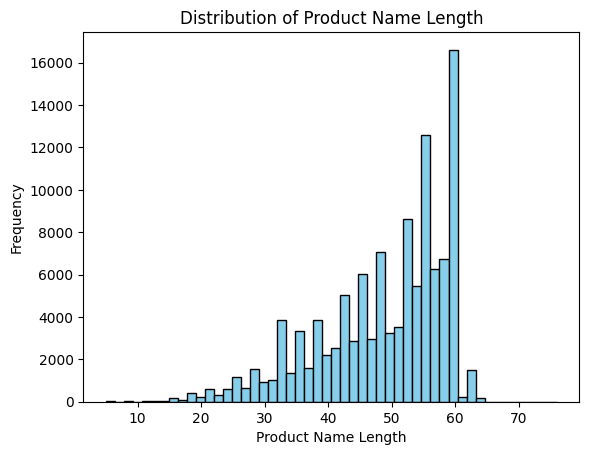

In [26]:
#Check skewness for 'product_name_length'
df_merge['product_name_lenght'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Name Length')
plt.xlabel('Product Name Length')
plt.ylabel('Frequency')
plt.show()

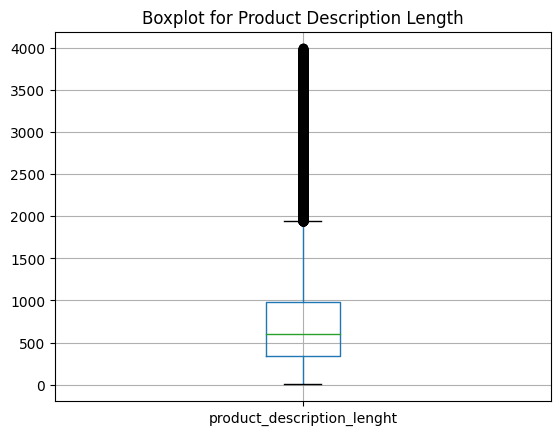

In [24]:
#Check for outliers in 'product_description_length'
df_merge.boxplot(column='product_description_lenght')
plt.title('Boxplot for Product Description Length')
plt.show()

In [27]:
# Fill missing values with the median for product_name_length and product_description_length
df_merge['product_name_lenght'].fillna(df_merge['product_name_lenght'].median(), inplace=True)
df_merge['product_description_lenght'].fillna(df_merge['product_description_lenght'].median(), inplace=True)
df_merge['product_length_cm'].fillna(df_merge['product_length_cm'].mean(), inplace=True)
df_merge['product_height_cm'].fillna(df_merge['product_height_cm'].mean(), inplace=True)
df_merge['product_weight_g'].fillna(df_merge['product_weight_g'].mean(), inplace=True)
df_merge['product_width_cm'].fillna(df_merge['product_width_cm'].mean(), inplace=True)

<ipython-input-27-4f34c6f878f5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merge['product_description_lenght'].fillna(df_merge['product_description_lenght'].median(), inplace=True)
<ipython-input-27-4f34c6f878f5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [28]:
# Extracting datetime components from 'order_purchase_timestamp'
df_merge['day_of_week_name'] = df_merge['order_purchase_timestamp'].dt.strftime('%A')
df_merge['month_year'] = df_merge['order_purchase_timestamp'].dt.strftime('%Y-%m')
df_merge['day_month_year'] = df_merge['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')
df_merge['day_of_week_int'] = df_merge['order_purchase_timestamp'].dt.weekday + 1
df_merge['hour'] = df_merge['order_purchase_timestamp'].dt.hour
df_merge['month'] = df_merge['order_purchase_timestamp'].dt.month
df_merge['year'] = df_merge['order_purchase_timestamp'].dt.year

# Extracting datetime components from 'order_delivered_customer_date'
df_merge['day_month_year_delivered'] = df_merge['order_delivered_customer_date'].dt.strftime('%Y-%m-%d')

# Calculating delivery time (in days)
df_merge['delivery_time'] = (df_merge['order_delivered_customer_date'] - df_merge['order_purchase_timestamp']).dt.days

# Calculate the time difference (in minutes) between order purchase and approval
df_merge['approval_time'] = (df_merge['order_approved_at'] - df_merge['order_purchase_timestamp']).dt.total_seconds() / 60  # in minutes

# Calculate the time difference (in days) between order purchase and approval
df_merge['approval_time_days'] = (df_merge['order_approved_at'] - df_merge['order_purchase_timestamp']).dt.days

In [29]:
df_merge['day_month_year'] = pd.to_datetime(df_merge['day_month_year'], errors='coerce')

In [30]:
df_merge['day_month_year_delivered'] = pd.to_datetime(df_merge['day_month_year_delivered'], errors='coerce')

In [31]:
df_merge.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
order_item_id,0
product_id,0


In [32]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117329 non-null  object        
 1   customer_id                    117329 non-null  object        
 2   order_status                   117329 non-null  object        
 3   order_purchase_timestamp       117329 non-null  datetime64[ns]
 4   order_approved_at              117329 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117329 non-null  datetime64[ns]
 6   order_delivered_customer_date  117329 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117329 non-null  datetime64[ns]
 8   order_item_id                  117329 non-null  int64         
 9   product_id                     117329 non-null  object        
 10  seller_id                      117329 non-null  object        
 11  

In [31]:
# Check if the column exists with exact spelling
print("Columns in df_merge:", df_merge.columns.tolist())


Columns in df_merge: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'product_category_name_english', 'order_total', 'day_of_week_name', 'month_year', 'day_month_year', 'day_of_week_int', 'hour', 'month', 'year', 'day_month_year_de

<ipython-input-32-14fef8a080ef>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_over_time = df_merge['price'].resample('M').sum()


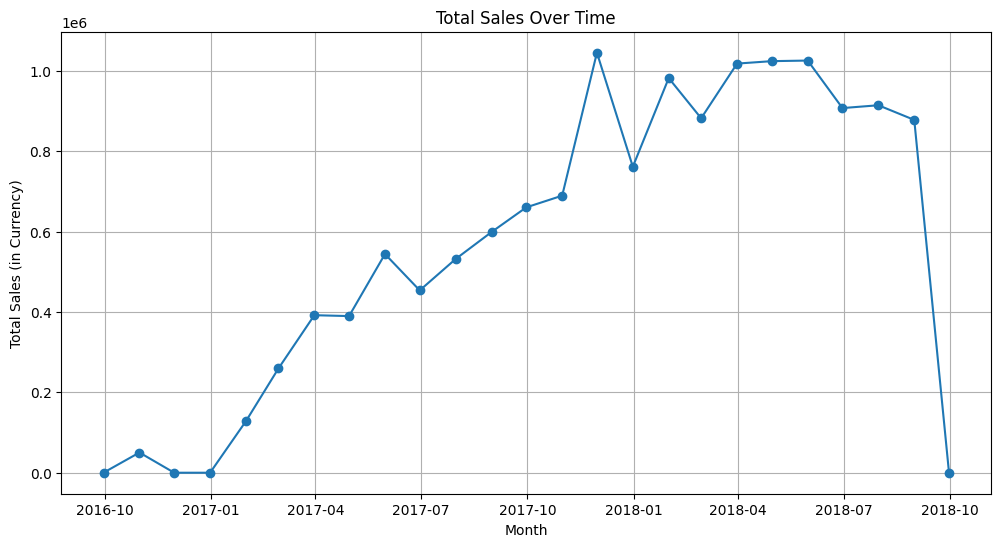

In [32]:
# Ensure 'order_purchase_timestamp' is in datetime format
df_merge['order_purchase_timestamp'] = pd.to_datetime(df_merge['order_purchase_timestamp'])

# Set 'order_purchase_timestamp' as the index
df_merge.set_index('order_purchase_timestamp', inplace=True)

# Resample to get monthly sales
sales_over_time = df_merge['price'].resample('M').sum()

# Plotting the sales over time
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index, sales_over_time.values, marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales (in Currency)')
plt.grid()
plt.show()

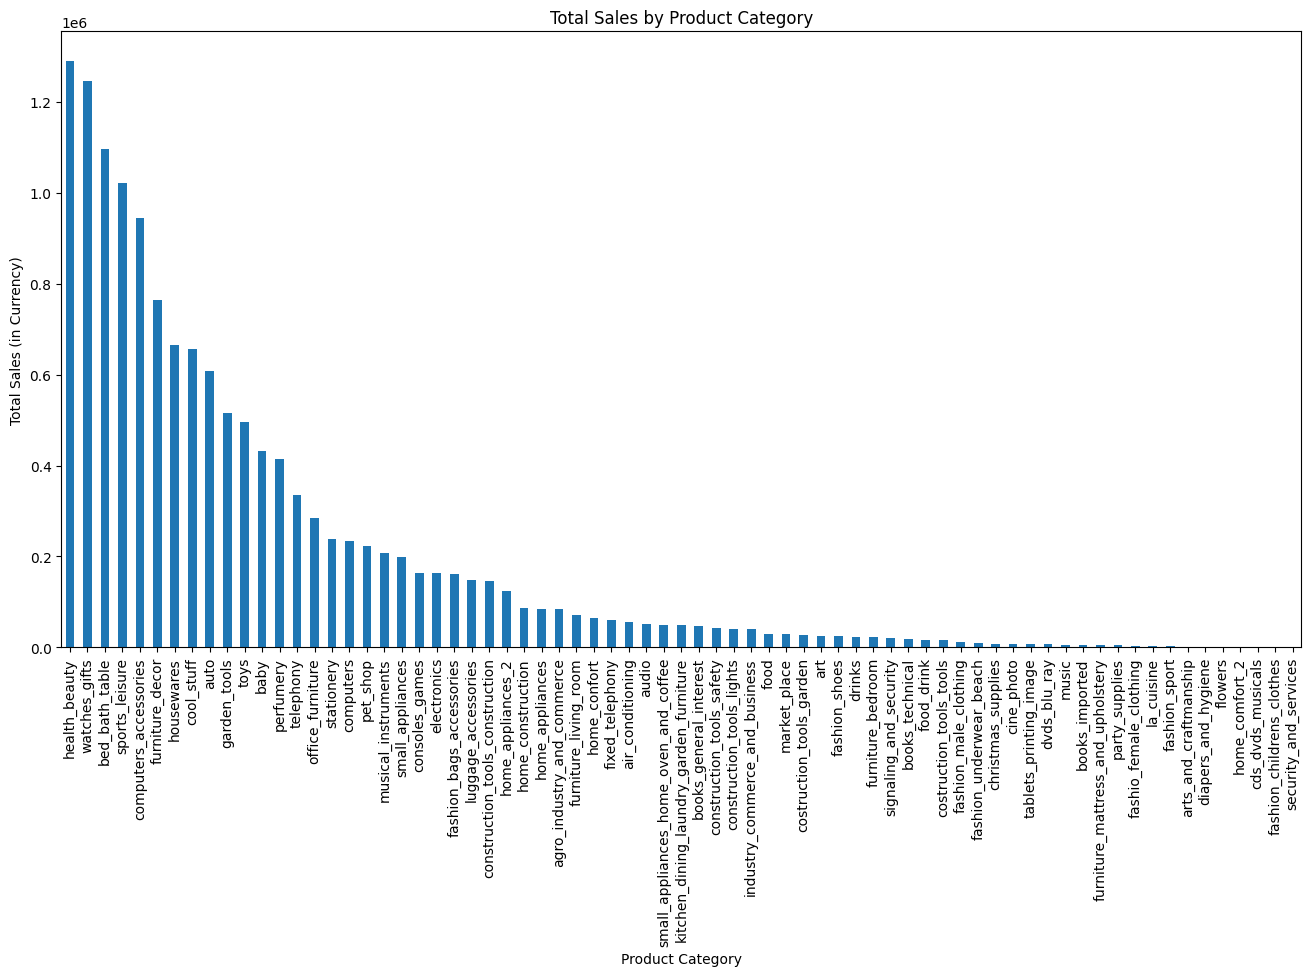

In [35]:
sales_by_category = df_merge.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False)

plt.figure(figsize=(16, 8))
sales_by_category.plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales (in Currency)')
plt.xticks(rotation=90)
plt.show()

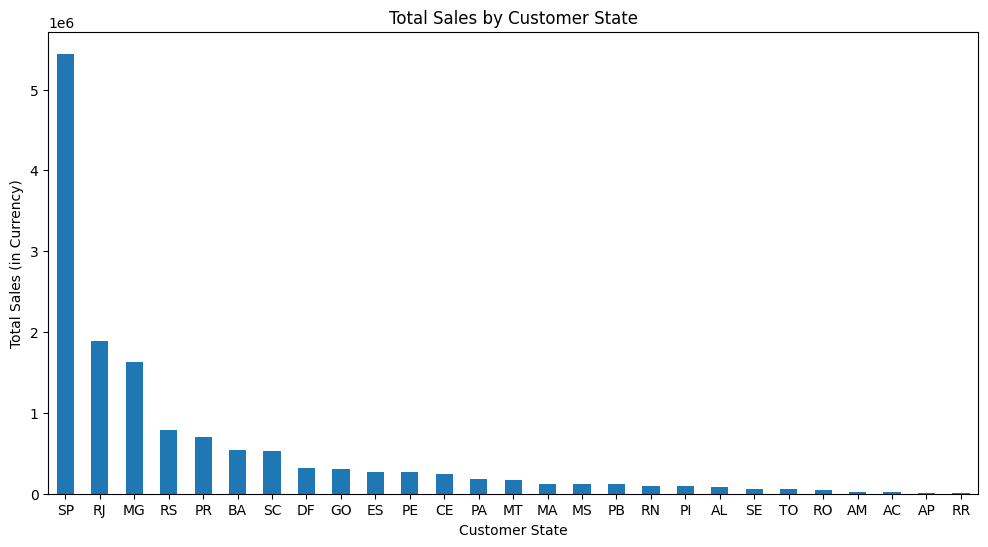

In [36]:
sales_by_state = df_merge.groupby('customer_state')['price'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sales_by_state.plot(kind='bar')
plt.title('Total Sales by Customer State')
plt.xlabel('Customer State')
plt.ylabel('Total Sales (in Currency)')
plt.xticks(rotation=0)
plt.show()

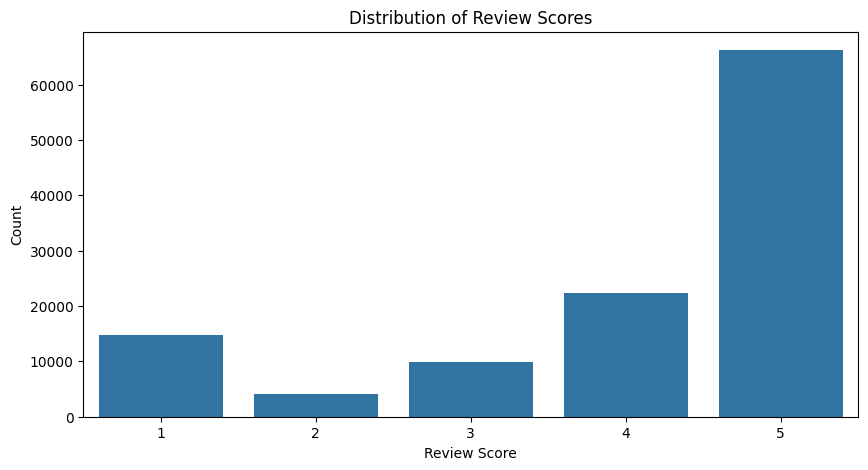

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_merge, x='review_score')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

# Save the prepared data to a Pickle file

In [33]:

df_order_items.to_pickle('prepared_order_items.pkl')

# Model Selection

# Load the prepared data from a Pickle file

In [34]:
df_order_items = pd.read_pickle('prepared_order_items.pkl')

In [35]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.7 MB/s eta 0:00:00


# Import necessary libraries

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)

In [37]:
# Use the features identified as potentially relevant for sales prediction.
X = df_merge[['freight_value','product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm',
              'product_width_cm', 'payment_value', 'payment_installments', 'day_of_week_int',
              'hour', 'month', 'year', 'delivery_time', 'approval_time', 'approval_time_days',
              'order_status', 'product_category_name', 'product_category_name_english',
              'payment_type', 'customer_city', 'customer_state', 'seller_city', 'seller_state',
              'day_of_week_name', 'month_year']]

y = df_merge['price']  # Assuming 'price' is the target to predict sales


# Separate Numerical and Categorical Features

In [38]:
# Step 3: Separate numerical and categorical features
# Separate features into numerical and categorical lists for different preprocessing steps.
numerical_features = ['freight_value','product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm',
                      'product_width_cm', 'payment_value', 'payment_installments', 'day_of_week_int',
                      'hour', 'month', 'year', 'delivery_time', 'approval_time', 'approval_time_days']

categorical_features = ['order_status', 'product_category_name', 'product_category_name_english',
                        'payment_type', 'customer_city', 'customer_state', 'seller_city',
                        'seller_state', 'day_of_week_name', 'month_year']

# Extract numerical and categorical data separately for processing
# This allows us to handle different preprocessing steps for numerical and categorical data.
X_numerical = X[numerical_features]
X_categorical = X[categorical_features]

Scaling the Numerical Features

In [39]:
# StandardScaler standardizes the numerical features by centering them around the mean and scaling to unit variance.
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)


Binary Encoding for Categorical Features

In [40]:
# Encoding the categorical features using Binary Encoding
# Binary encoding is used to convert categorical variables into a binary format, reducing dimensionality compared to one-hot encoding.
encoder = BinaryEncoder()
X_categorical_encoded = encoder.fit_transform(X_categorical)

Combine the Transformed Features

In [41]:
# Combine the transformed numerical and encoded categorical features
# Use numpy's hstack to combine numerical and categorical data for model training.
X_transformed = np.hstack((X_numerical_scaled, X_categorical_encoded))


# Split the Data into Training and Test Sets

In [42]:
# The train_test_split function divides the dataset into training and testing sets, ensuring 80% of data for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Final comment: The data is now prepared for model training and selection.


# Handle missing values

In [43]:
from sklearn.impute import SimpleImputer

X_train_numerical = X_train[:, :len(numerical_features)]
X_test_numerical = X_test[:, :len(numerical_features)]

X_train_categorical = X_train[:, len(numerical_features):]
X_test_categorical = X_test[:, len(numerical_features):]

# Impute missing values for numerical features with the mean
numerical_imputer = SimpleImputer(strategy='mean')
X_train_numerical = numerical_imputer.fit_transform(X_train_numerical)
X_test_numerical = numerical_imputer.transform(X_test_numerical)

# Impute missing values for categorical features with the most frequent value (mode)
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train_categorical = categorical_imputer.fit_transform(X_train_categorical)
X_test_categorical = categorical_imputer.transform(X_test_categorical)

# Combine the numerical and categorical features again after imputation
X_train = np.hstack((X_train_numerical, X_train_categorical))
X_test = np.hstack((X_test_numerical, X_test_categorical))

# Train Each Model Separately and Evaluate

In [44]:
# Import necessary libraries for model training and evaluation
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

Define a function to train and evaluate each model

In [45]:
# Function to evaluate the models and store their metrics
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Trains the given model, makes predictions, and evaluates its performance using MSE and R² score.
    """
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display the model's performance
    print(f'{model.__class__.__name__} - Mean Squared Error: {mse:.4f}, R² Score: {r2:.4f}')

# Instantiate and train the models separately

Linear Regression

In [52]:
print("\nTraining and Evaluating: Linear Regression")
linear_model = LinearRegression()
train_and_evaluate_model(linear_model, X_train, X_test, y_train, y_test)


Training and Evaluating: Linear Regression
LinearRegression - Mean Squared Error: 14036.7266, R² Score: 0.5947


Ridge Regression

In [ ]:
print("\nTraining and Evaluating: Ridge Regression")
ridge_model = Ridge()
train_and_evaluate_model(ridge_model, X_train, X_test, y_train, y_test)


Training and Evaluating: Ridge Regression
Ridge - Mean Squared Error: 14033.7204, R² Score: 0.5948


Lasso Regression

In [ ]:
print("\nTraining and Evaluating: Lasso Regression")
lasso_model = Lasso()
train_and_evaluate_model(lasso_model, X_train, X_test, y_train, y_test)


Training and Evaluating: Lasso Regression
Lasso - Mean Squared Error: 14371.0928, R² Score: 0.5851


K-Neighbors Regressor


In [ ]:
print("\nTraining and Evaluating: K-Nearest Neighbors Regressor")
knn_model = KNeighborsRegressor()
train_and_evaluate_model(knn_model, X_train, X_test, y_train, y_test)


Training and Evaluating: K-Nearest Neighbors Regressor
KNeighborsRegressor - Mean Squared Error: 7195.2703, R² Score: 0.7923


Decision Tree Regressor


In [53]:
print("\nTraining and Evaluating: Decision Tree Regressor")
decision_tree_model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5)
train_and_evaluate_model(decision_tree_model, X_train, X_test, y_train, y_test)


Training and Evaluating: Decision Tree Regressor
DecisionTreeRegressor - Mean Squared Error: 6902.0209, R² Score: 0.8007


Random Forest Regressor


In [46]:
print("\nTraining and Evaluating: Random Forest Regressor")
random_forest_model = RandomForestRegressor()
train_and_evaluate_model(random_forest_model, X_train, X_test, y_train, y_test)


Training and Evaluating: Random Forest Regressor
RandomForestRegressor - Mean Squared Error: 3236.6334, R² Score: 0.9066


# HyperParameter Tuning for Random forest Model

In [47]:
# Define the parameter grid for Randomized Search
param_grid = {
    'n_estimators': [100, 200, 500],                # Fewer trees in the forest
    'max_depth': [None, 10, 20],                    # Fewer depth options
    'min_samples_split': [2, 5],                    # Fewer split options
    'min_samples_leaf': [1, 2],                     # Fewer leaf options
    'max_features': ['sqrt', None],                 # Fewer feature options
    'bootstrap': [True]                             # Keep bootstrap method fixed for faster search
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=20,                # Reduced number of random combinations
    scoring='neg_mean_squared_error',
    cv=2,                     # Reduced number of cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1                 # Use all available cores
)

# Fit the Randomized Search to the training data
random_search.fit(X_train, y_train)

# Retrieve the best parameters and evaluate the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate the Mean Squared Error and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error of the best model: {mse:.4f}")
print(f"R² Score of the best model: {r2:.4f}")

Fitting 2 folds for each of 20 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20, 'bootstrap': True}
Mean Squared Error of the best model: 3246.0436
R² Score of the best model: 0.9063


# MLOps Implementation with MLflow

In [2]:
!pip install mlflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.4/568.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.2 MB/s eta 0:00:00


In [56]:
mlflow.end_run()

In [59]:
import mlflow
import mlflow.sklearn

# Create an input example for logging with MLflow
input_example = [[
    15.87,               # freight_value (Numerical)
    2,                   # product_photos_qty (Numerical)
    500,                 # product_weight_g (Numerical)
    30,                  # product_length_cm (Numerical)
    10,                  # product_height_cm (Numerical)
    15,                  # product_width_cm (Numerical)
    120,                 # payment_value (Numerical)
    3,                   # payment_installments (Numerical)
    4,                   # day_of_week_int (Numerical)
    14,                  # hour (Numerical)
    8,                   # month (Numerical)
    2023,                # year (Numerical)
    7,                   # delivery_time (Numerical, days)
    120.0,               # approval_time (Numerical, minutes)
    2,                   # approval_time_days (Numerical, days)
    1,                   # order_status (Encoded Categorical)
    5,                   # product_category_name (Encoded Categorical)
    3,                   # product_category_name_english (Encoded Categorical)
    2,                   # payment_type (Encoded Categorical)
    10,                  # customer_city (Encoded Categorical)
    1,                   # customer_state (Encoded Categorical)
    7,                   # seller_city (Encoded Categorical)
    4,                   # seller_state (Encoded Categorical)
    3,                   # day_of_week_name (Encoded Categorical)
    12                   # month_year (Encoded Categorical)
]]

with mlflow.start_run():
    # Train your Random Forest model
    random_forest_model.fit(X_train, y_train)

    # Log model parameters
    mlflow.log_param('n_estimators', 500)
    mlflow.log_param('min_samples_split', 2)
    mlflow.log_param('min_samples_leaf', 1)
    mlflow.log_param('max_features', None)
    mlflow.log_param('max_depth', 20)
    mlflow.log_param('bootstrap', True)

    # Calculate evaluation metrics
    y_pred = random_forest_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Log model performance metrics
    mlflow.log_metric('mse', mse)
    mlflow.log_metric('r2', r2)

    # Log the model itself, including the input_example
    mlflow.sklearn.log_model(random_forest_model, "random_forest_model", input_example=input_example)


2024/10/18 20:44:58 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: MlflowException('Expected all values in list to be of same type'). To see the full traceback, set the logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)`. To disable automatic signature inference, set `signature` to `False` in your `log_model` or `save_model` call.


2024/10/18 20:45:17 WARNING mlflow.models.model: Failed to validate serving input example {
  "inputs": [
    [
      15.87,
      2,
      500,
      30,
      10,
      15,
      120,
      3,
      4,
      14,
      8,
      2023,
      7,
      120.0,
      2,
      1,
      5,
      3,
      2,
      10,
      1,
      7,
      4,
      3,
      12
    ]
  ]
}. Alternatively, you can avoid passing input example and pass model signature instead when logging the model. To ensure the input example is valid prior to serving, please try calling `mlflow.models.validate_serving_input` on the model uri and serving input example. A serving input example can be generated from model input example using `mlflow.models.convert_input_example_to_serving_input` function.
Got error: X has 25 features, but RandomForestRegressor is expecting 76 features as input.


# Deploying with Streamlit


 Save The Model

In [74]:
import joblib

# Save the model
joblib.dump(random_forest_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

Create a Streamlit App

In [72]:
!pip install streamlit

In [96]:
# Define your Streamlit script
streamlit_script = """

import streamlit as st
import joblib
import numpy as np

# Load the saved model
import os
st.write("Current Working Directory:", os.getcwd())
model = joblib.load('random_forest_model.pkl')

# Streamlit app title
st.title('Sales Forecasting Model')

# Create input fields for all required features
freight_value = st.number_input('Freight Value')
product_photos_qty = st.number_input('Product Photos Quantity')
product_weight_g = st.number_input('Product Weight (g)')
product_length_cm = st.number_input('Product Length (cm)')
product_height_cm = st.number_input('Product Height (cm)')
product_width_cm = st.number_input('Product Width (cm)')
payment_value = st.number_input('Payment Value')
payment_installments = st.number_input('Payment Installments')
day_of_week_int = st.number_input('Day of the Week (Integer)')
hour = st.number_input('Hour')
month = st.number_input('Month')
year = st.number_input('Year')
delivery_time = st.number_input('Delivery Time (Days)')
approval_time = st.number_input('Approval Time (Minutes)')
approval_time_days = st.number_input('Approval Time (Days)')

# Store the inputs in a list and convert to numpy array
features = np.array([[freight_value, product_photos_qty, product_weight_g,
                      product_length_cm, product_height_cm, product_width_cm,
                      payment_value, payment_installments, day_of_week_int,
                      hour, month, year, delivery_time, approval_time,
                      approval_time_days]])

# Prediction
if st.button('Predict'):
    prediction = model.predict(features)
    st.write(f'The predicted sales price is: {prediction[0]:.2f}')

"""

Save the script to a .py file

In [97]:
with open('Sales_Forecasting_Model.py', 'w') as f:
    f.write(streamlit_script)

Download the Streamlit script

In [98]:

from google.colab import files
files.download('Sales_Forecasting_Model.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>